In [1]:
%matplotlib inline

In [2]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
alpha = 0.7
max_it = 3000
matrix = np.genfromtxt("part2data1.txt",delimiter = ',')
NUM_OF_DATA = len(matrix)

X = (matrix[:,0:2])
X = np.concatenate((np.ones((1,NUM_OF_DATA)), X.T)).T
Y = (matrix[:,2])

In [4]:
x_min = X.min(0)
x_max = X.max(0)
x_mean = X.mean(0)
def feature_scale( feature_num, a):
    return (a - x_mean[feature_num]) / (x_max[feature_num] - x_min[feature_num])

In [5]:
def feature_scaling_all(x):
    for j in range(1,3):
        for i in range(0,len(x)):
            x[i][j] = feature_scale(j, x[i][j])

In [6]:
feature_scaling_all(X)

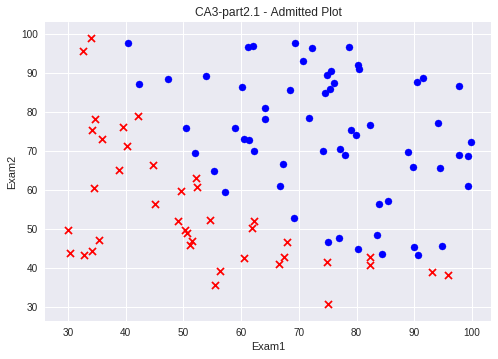

In [7]:
pass_student = matrix[matrix[:,2]==1.]
failed_student = matrix[matrix[:,2]==0.0]
plt.scatter(pass_student[:,0], pass_student[:,1], s=50, c='b', marker='o', label='Admitted')
plt.scatter(failed_student[:,0], failed_student[:,1], s=50, c='r', marker='x', label='Not Admitted')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('CA3-part2.1 - Admitted Plot')

In [8]:
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

In [9]:
def cost(theta, X, y):
    first = np.multiply(-y, np.log(sigmoid(np.dot(X , theta.T))))
    second = np.multiply((1 - y), np.log(1 - sigmoid(np.dot(X , theta.T))))
    return np.sum(first - second) / (len(X))

In [10]:
def gradient(theta, X, y):  
    parameters = 3
    grad = np.zeros(parameters)
    error = sigmoid(np.dot(X,theta.T)) - y
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

In [11]:
x = X
y = Y
n = 3
m = NUM_OF_DATA
theta = np.ones(n)
count_it = 0
J = []
while count_it < max_it :
    count_it += 1
    npd = np.dot(x , theta)
    npde = np.exp(-npd)
    h = 1./(1 + npde)
    j = cost(theta,x,y)
    g = gradient(theta,x,y)
    theta = theta - alpha * g
    J.append(j)
print theta
print j
#return theta , J

[  1.48518774  12.42653445  11.81017114]
0.205578474505


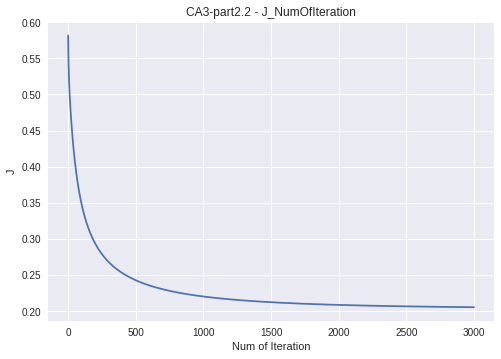

In [12]:
plt.plot(J)
plt.xlabel('Num of Iteration')
plt.ylabel('J')
plt.title('CA3-part2.2 - J_NumOfIteration')

In [13]:
def Incode_features_scaling(vec,theta):
    ans = theta[0]
    for i in range(1,n):
        ans += feature_scale(i , vec[i]) * theta[i]

    return ans

In [14]:
def probability(theta,exam1,exam2):
    return sigmoid(Incode_features_scaling([1.,exam1,exam2],theta))

def predict(theta,exam1,exam2):
    prob = probability(theta,exam1,exam2)
    if prob > 0.5:
        return 1
    return 0

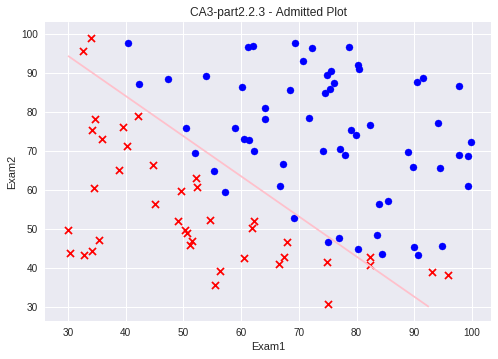

In [28]:
x = np.arange(30., 100., 0.5)
y = np.arange(30., 100., 0.5)
xx, yy = np.meshgrid(x, y)
z = xx
for i in range(0,len(xx)):
    for j in range(0,len(yy)):
        z[i][j] = probability(theta,xx[i][j],yy[i][j])
        
plt.scatter(pass_student[:,0], pass_student[:,1], s=50, c='b', marker='o', label='Admitted')
plt.scatter(failed_student[:,0], failed_student[:,1], s=50, c='r', marker='x', label='Not Admitted')        
plt.contour(x, y, z ,[0.5] , colors='pink')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('CA3-part2.2.3 - Admitted Plot')

In [29]:
print probability(theta,45.,85.)
print predict(theta,45.,85.)

0.7420924696
1
